2025-06-29 23:23:57.004805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/petr/PycharmProjects/Graph/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


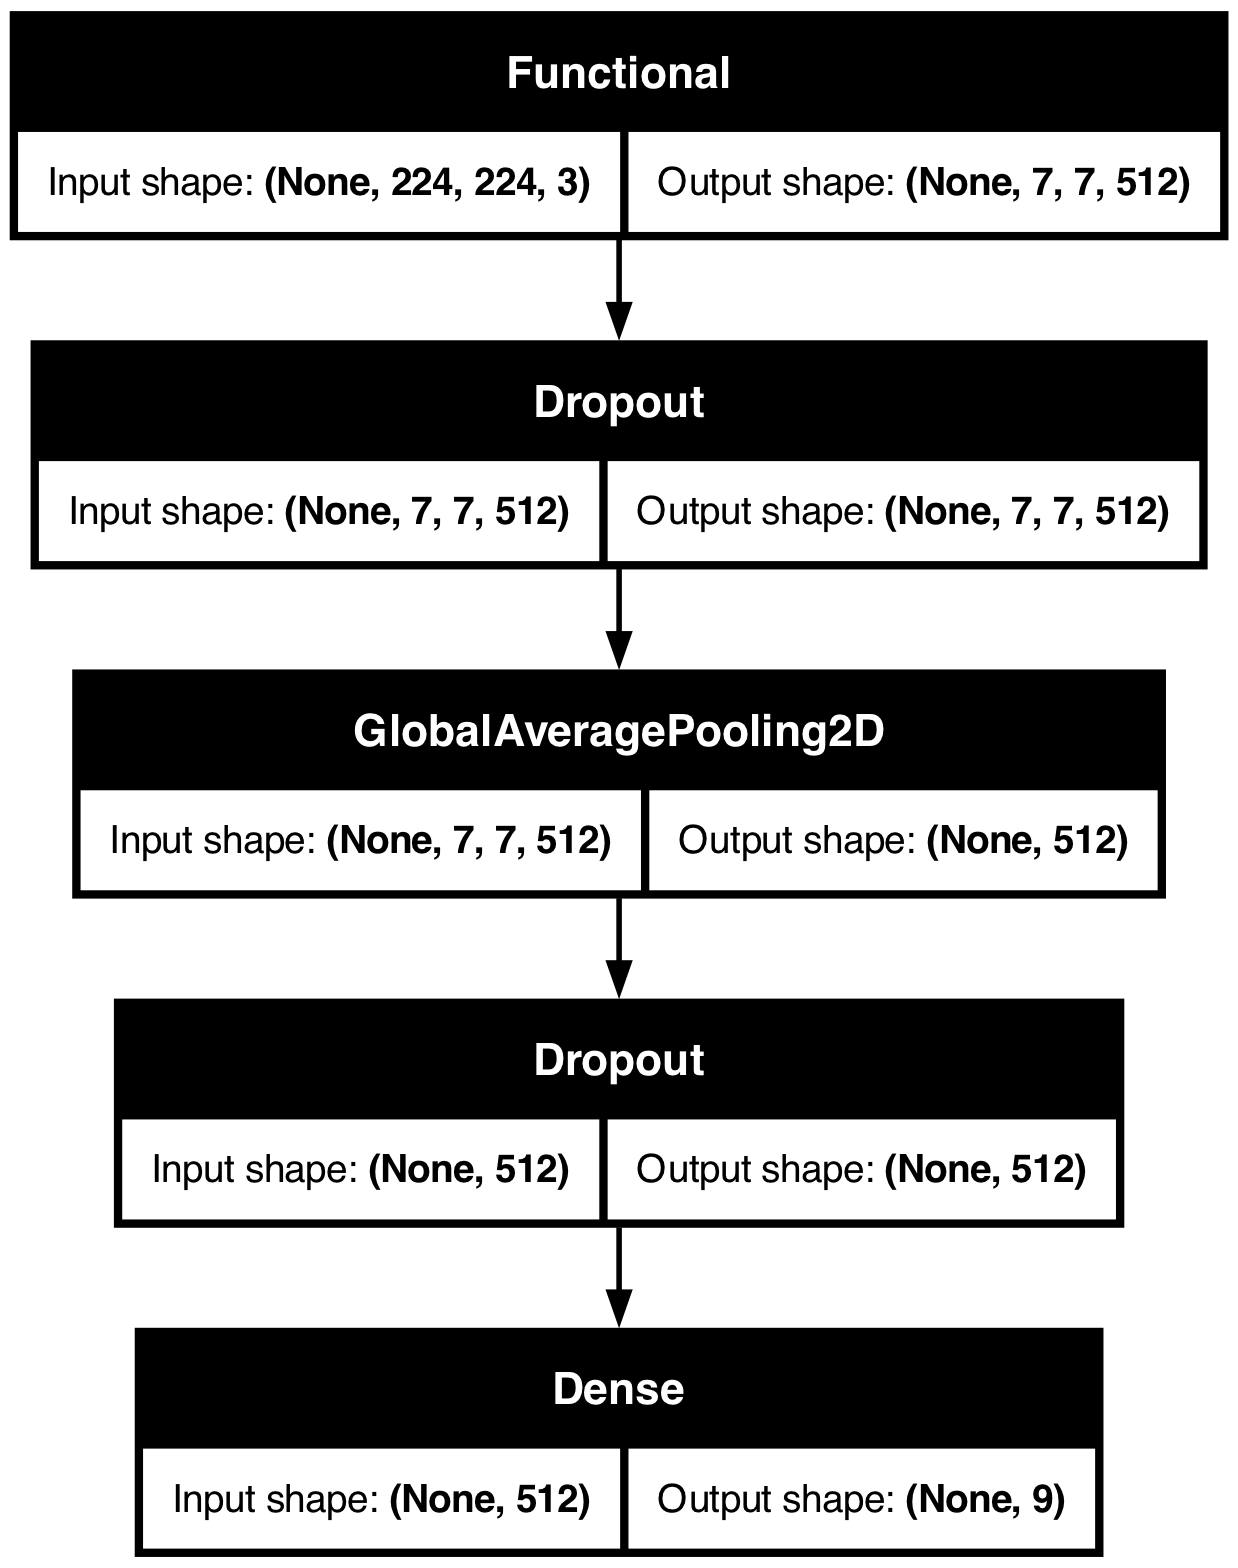

In [1]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
img_width, img_height = 224, 224
# Входной тензор
input_shape = (img_width, img_height,3)
# Количество классов для обучения
num_classes = 9
# Количество эпох обучения
# Количество изображений, которые будут подаваться НС при одной итерации обучения
model_name = "VGG16"

if model_name == "MobileNet":
    from keras.applications import MobileNet
    base_model = MobileNet(
        input_shape=(img_width, img_height, 3),
        include_top=False, #True
        weights='imagenet',
        classes=num_classes,
    )
if model_name == "VGG16":
    from keras.applications import VGG16
    base_model = VGG16(
        input_shape=(img_width, img_height, 3),
        include_top=False, #True
        weights='imagenet',
        classes=num_classes,
    )
# Включаем переобучение основной модели
base_model.trainable = True
# Добавляем слои полносвязного слоя в модель
model = Sequential()
model.add(base_model)
model.add(Dropout(0.1))
model.add(GlobalAveragePooling2D(name='global_average_pooling2d'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', name='predictions'))
# model.load_weights('03_acc_0.90.h5')



for cnn_block_layer in model.layers[0].layers:
   cnn_block_layer.trainable = True
model.layers[0].trainable = True
import graphviz, pydot
plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
from graphviz import Digraph

dot = Digraph(comment='U-Net Architecture', format='png')

# Установка ориентации страницы: landscape (альбомная)
dot.attr(dpi="400", rankdir='', size='10,8')  # горизонтальное расположение, размер страницы

# Минимизация размера шрифтов и размеров блоков для компактности
node_attrs = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue', 'fontsize':'40'}
edge_attrs = {'fontsize':'7', "width": "30"}

# Блоки
blocks = [
    ('Input', 'Input Image'),
    ('Enc1', 'Encoder Block 1'),
    ('Pool1', 'Max Pool'),
    ('Enc2', 'Encoder Block 2'),
    ('Pool2', 'Max Pool'),
    ('Enc3', 'Encoder Block 3'),
    ('Pool3', 'Max Pool'),
    ('Enc4', 'Encoder Block 4'),
    ('Pool4', 'Max Pool'),
    ('Bridge', 'Bridge'),
    ('Dec4', 'Decoder Block 4'),
    ('Up4', 'Upsample 4'),
    ('Dec3', 'Decoder Block 3'),
    ('Up3', 'Upsample 3'),
    ('Dec2', 'Decoder Block 2'),
    ('Up2', 'Upsample 2'),
    ('Dec1', 'Decoder Block 1'),
    ('Up1', 'Upsample 1'),
    ('Output', 'Output Segmentation Map')
]

for node_id, label in blocks:
    dot.node(node_id, label, **node_attrs)

# Основные связи
edges = [
    ('Input', 'Enc1'),
    ('Enc1', 'Pool1'),
    ('Pool1', 'Enc2'),
    ('Enc2', 'Pool2'),
    ('Pool2', 'Enc3'),
    ('Enc3', 'Pool3'),
    ('Pool3', 'Enc4'),
    ('Enc4', 'Pool4'),
    ('Pool4', 'Bridge'),
    ('Bridge', 'Dec4'),
    ('Dec4', 'Up4'),
    ('Up4', 'Dec3'),
    ('Dec3', 'Up3'),
    ('Up3', 'Dec2'),
    ('Dec2', 'Up2'),
    ('Up2', 'Dec1'),
    ('Dec1', 'Up1'),
    ('Up1', 'Output')
]

for start, end in edges:
    dot.edge(start, end, **edge_attrs)

# Skip connections (dashed, gray)
skip_connections = [
    ('Enc4', 'Dec4'),
    ('Enc3', 'Dec3'),
    ('Enc2', 'Dec2'),
    ('Enc1', 'Dec1')
]

for start, end in skip_connections:
    dot.edge(start, end, style='dashed', color='gray', **edge_attrs)

# Генерация и сохранение
dot.render('unet_compact', engine='dot')
print("Компактная ориентированная диаграмма сохранена как unet_compact.png")

Компактная ориентированная диаграмма сохранена как unet_compact.png


In [37]:
from graphviz import Digraph

dot1 = Digraph(comment='VGG16 Part 1', format='png')

# Общие параметры
node_attrs = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue', 'fontsize': "60"}

# Входной слой
dot1.node('Input', 'Input Image\n(224x224x3)', **node_attrs)

# Блок 1
dot1.node('Conv1_1', 'Conv 64\n3x3', **node_attrs)
dot1.node('Conv1_2', 'Conv 64\n3x3', **node_attrs)
dot1.node('Pool1', 'Max Pool\n2x2', **node_attrs)

# Блок 2
dot1.node('Conv2_1', 'Conv 128\n3x3', **node_attrs)
dot1.node('Conv2_2', 'Conv 128\n3x3', **node_attrs)
dot1.node('Pool2', 'Max Pool\n2x2', **node_attrs)

# Блок 3
dot1.node('Conv3_1', 'Conv 256\n3x3', **node_attrs)
dot1.node('Conv3_2', 'Conv 256\n3x3', **node_attrs)
dot1.node('Conv3_3', 'Conv 256\n3x3', **node_attrs)
dot1.node('Pool3', 'Max Pool\n2x2', **node_attrs)

# Блок 4
dot1.node('Conv4_1', 'Conv 512\n3x3', **node_attrs)
dot1.node('Conv4_2', 'Conv 512\n3x3', **node_attrs)
dot1.node('Conv4_3', 'Conv 512\n3x3', **node_attrs)
dot1.node('Pool4', 'Max Pool\n2x2', **node_attrs)

# Связи
dot1.edge('Input', 'Conv1_1')
dot1.edge('Conv1_1', 'Conv1_2')
dot1.edge('Conv1_2', 'Pool1')

dot1.edge('Pool1', 'Conv2_1')
dot1.edge('Conv2_1', 'Conv2_2')
dot1.edge('Conv2_2', 'Pool2')

dot1.edge('Pool2', 'Conv3_1')
dot1.edge('Conv3_1', 'Conv3_2')
dot1.edge('Conv3_2', 'Conv3_3')
dot1.edge('Conv3_3', 'Pool3')

dot1.edge('Pool3', 'Conv4_1')
dot1.edge('Conv4_1', 'Conv4_2')
dot1.edge('Conv4_2', 'Conv4_3')
dot1.edge('Conv4_3', 'Pool4')

# Сохраняем или отображаем
dot1.render('vgg16_part1')


'vgg16_part1.png'

In [1]:
from graphviz import Digraph

dot2 = Digraph(comment='VGG16 Part 2', format='png')

# Общие параметры
node_attrs = {'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue', 'fontsize': "60"}

# Блок 5
dot2.node('Conv5_1', 'Conv 512\n3x3', **node_attrs)
dot2.node('Conv5_2', 'Conv 512\n3x3', **node_attrs)
dot2.node('Conv5_3', 'Conv 512\n3x3', **node_attrs)
dot2.node('Pool5', 'Max Pool\n2x2', **node_attrs)

# Полносвязные слои
dot2.node('FC6', 'FC 4096', **node_attrs)
dot2.node('FC7', 'FC 4096', **node_attrs)
dot2.node('FC8', 'FC 1000', **node_attrs)
dot2.node('Output', 'Softmax\n(N Classes)', shape='oval', style='filled', fillcolor='lightgreen', fontsize= "60")

# Связи
dot2.edge('Pool4', 'Conv5_1')
dot2.edge('Conv5_1', 'Conv5_2')
dot2.edge('Conv5_2', 'Conv5_3')
dot2.edge('Conv5_3', 'Pool5')

dot2.edge('Pool5', 'FC6')
dot2.edge('FC6', 'FC7')
dot2.edge('FC7', 'FC8')
dot2.edge('FC8', 'Output')

# Сохраняем или отображаем
dot2.render('vgg16_part2')

'vgg16_part2.png'

In [6]:
from graphviz import Digraph

# Создаем граф
dot = Digraph(comment='MobileNet Architecture', format='png')

fs = "50"
# Вход
dot.node('Input', 'Input Image\n(224x224x3)', shape='box', style='filled', color='lightblue', fontize=fs)

# Первичная свертка
dot.node('Conv1', 'Conv\n3x3, 32 filters', shape='box', style='filled', color='lightgreen', fontize=fs)
dot.edge('Input', 'Conv1')

# Блок 1
dot.node('DW1', 'Depthwise Conv\n3x3', shape='box', style='filled', color='orange')
dot.node('PW1', 'Pointwise Conv\n1x1, 64 filters', shape='box', style='filled', color='orange', fontize=fs)
dot.edge('Conv1', 'DW1')
dot.edge('DW1', 'PW1')

# Блок 2
dot.node('DW2', 'Depthwise Conv\n3x3', shape='box', style='filled', color='orange')
dot.node('PW2', 'Pointwise Conv\n1x1, 128 filters', shape='box', style='filled', color='orange')
dot.edge('PW1', 'DW2')
dot.edge('DW2', 'PW2')

# Блок 3
dot.node('DW3', 'Depthwise Conv\n3x3', shape='box', style='filled', color='orange', fontize=fs)
dot.node('PW3', 'Pointwise Conv\n1x1, 128 filters', shape='box', style='filled', color='orange', fontize=fs)
dot.edge('PW2', 'DW3')
dot.edge('DW3', 'PW3')

# Последовательность повторений можно продолжать по аналогии...

# Обобщение
dot.node('AvgPool', 'Global Average Pooling', shape='box', style='filled', color='lightpink', fontize=fs)
dot.edge('PW3', 'AvgPool')

# Выход
dot.node('Output', 'Softmax Classifier', shape='box', style='filled', color='lightgray', fontize=fs)
dot.edge('AvgPool', 'Output')

# Визуализация
dot.render('mobilenet_structure')

'mobilenet_structure.png'